In [1]:
from src import parameter_spaces as ps #where the Green Function is located

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import PIL

In [2]:
LEVEL = 6 

# picture dimensions
x_dim = 800
y_dim = 800

# real and imaginary range
x_min = 0.001
x_max = 0.710
y_min = 0.001j
y_max = 0.710j


# This is the Complex plane
cplx_plane = np.zeros((y_dim,x_dim),dtype=np.complex128)# Create a x_dim by y_dim array of numbers 0.0+0.0j.
for l in range(y_dim):
    cplx_plane[l] = np.linspace(x_min,x_max,x_dim) - np.linspace(y_min,y_max,y_dim)[l]
    #change the zeroes into the correct complex numbers based on the dimensions.

In [3]:
# This computes the points in the set M
barnsley = ps.green_MM0('b',cplx_plane,LEVEL,x_dim,y_dim)

In [4]:
# This computes the points in the set M_0
thurston = ps.green_MM0('t',cplx_plane,LEVEL,x_dim,y_dim)

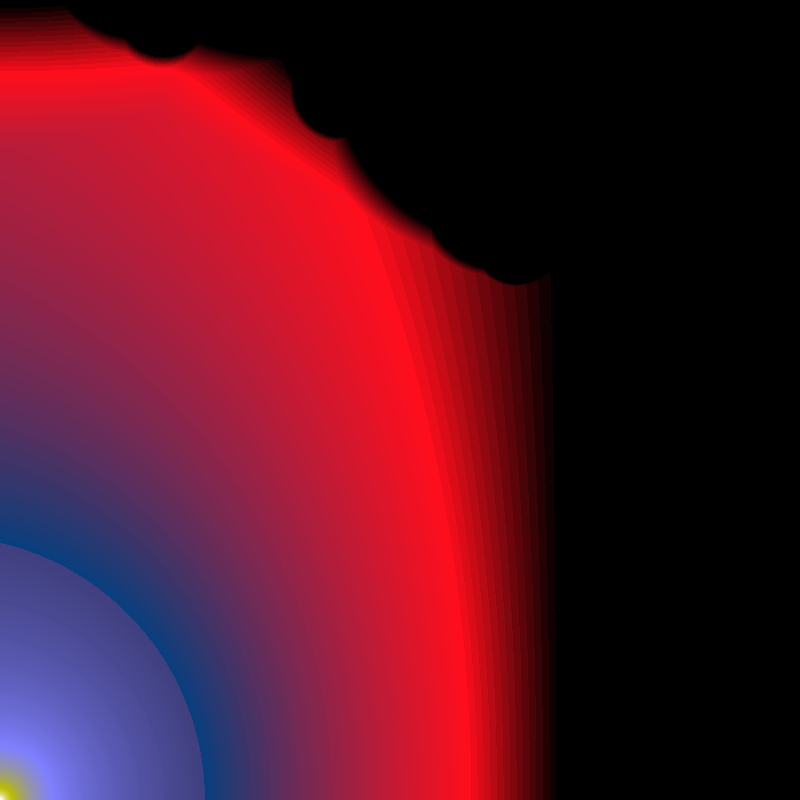

In [5]:
#Other possible color palettes: turbo, plasma, viridis, cividis, gist_stern, jet, twilight, twilight_shifted, binary

# This draws the Image of M
colors_b = plt.cm.gist_stern(barnsley)*255
colors_b = np.array(colors_b, dtype=np.uint8)
new_image_b = PIL.Image.fromarray(colors_b)
new_image_b = new_image_b.transpose(PIL.Image.Transpose.FLIP_TOP_BOTTOM)
img_b = new_image_b.resize((800,800))
display(img_b)

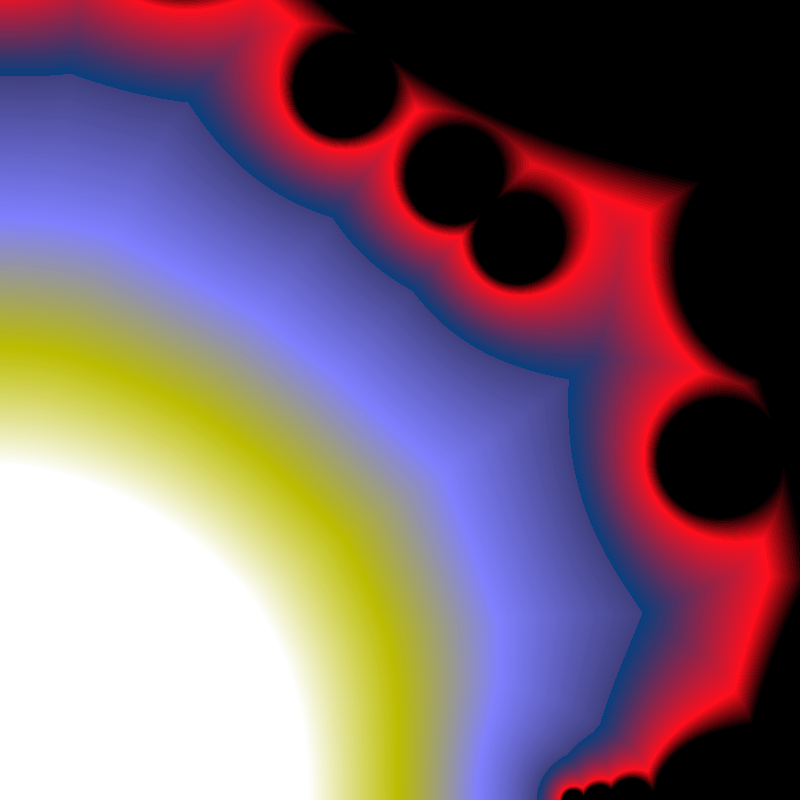

In [6]:
# This draws the Image of M_0
colors_t = plt.cm.gist_stern(thurston)*255
colors_t = np.array(colors_t, dtype=np.uint8)
new_image_t = PIL.Image.fromarray(colors_t)
new_image_t = new_image_t.transpose(PIL.Image.Transpose.FLIP_TOP_BOTTOM)
img_t = new_image_t.resize((800,800))
display(img_t)

## A different method with countour lines

In [7]:
from src import parameter_spaces as ps
import numpy as np
from matplotlib import ticker
from matplotlib import pyplot as plt

LEVEL = 3 

x_dim, y_dim = (600,600)

x_min, x_max = (0.001, 0.710)
y_min, y_max = (0.001, 0.710)

x_coords = np.linspace(x_min,x_max,x_dim)
y_coords = np.linspace(y_min,y_max,y_dim)

x, y = np.meshgrid(x_coords,y_coords)

In [8]:
# compute the green function for M
z_b = ps.green_MM0_contour('b', LEVEL, x, y)

In [9]:
# compute the green function for M_0
z_t = ps.green_MM0_contour('t', LEVEL, x, y)

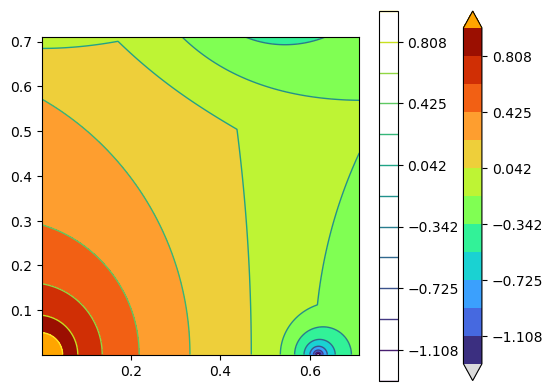

In [10]:
levels = np.linspace(-1.3,1,13)
cmap = plt.colormaps["turbo"].with_extremes(under="gainsboro", over="orange")
plt.contourf(x, y, z_b, levels=levels, cmap=cmap, extend="both")
plt.colorbar()
plt.contour(x, y, z_b, levels=levels, linewidths=(1,))
plt.colorbar()
plt.axis('scaled')
plt.show()

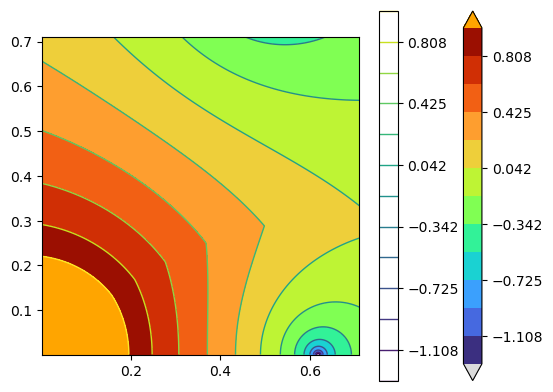

In [11]:
levels = np.linspace(-1.3,1,13)
cmap = plt.colormaps["turbo"].with_extremes(under="gainsboro", over="orange")
plt.contourf(x, y, z_t, levels=levels, cmap=cmap, extend="both")
plt.colorbar()
plt.contour(x, y, z_t, levels=levels, linewidths=(1,))
plt.colorbar()
plt.axis('scaled')
plt.show()
